<a href="https://colab.research.google.com/github/bagcakaya/Assignment_Police_Killings_US/blob/main/Assignment_Police_Killings_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [5]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [6]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


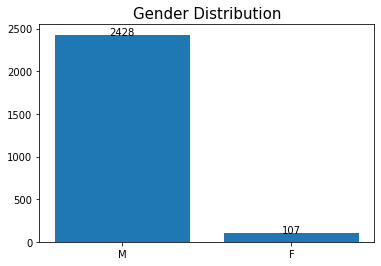

In [19]:
bars = kill['gender'].value_counts()
positions = kill['gender'].unique()
plt.bar(positions, bars)
plt.title('Gender Distribution', fontdict={'fontsize':15})
plt.text(x=0, y = bars[0], s = bars[0], ha="center")
plt.text(x=1, y = bars[1], s = bars[1], ha="center")
plt.show()

## 2: Plot 7 most common kill weapons

In [22]:
kill.armed.value_counts().head(7)

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

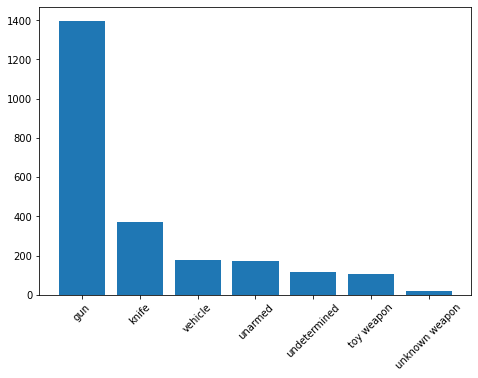

In [34]:
# with matplotlib
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Type_ = ['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon', 'unknown weapon']
Value = [1398, 373, 177, 171,117,104,18]
ax.bar(Type_,Value)
plt.xticks(rotation =45)
plt.show();

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [45]:
kill["category"]=kill.age.apply(lambda x : "above25" if x >= 25 else "below25")
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat,categoryt,category
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25,above25,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25,above25,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25,below25,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25,above25,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25,above25,above25


In [49]:
age_class=kill.age_cat.value_counts()
age_class

above25    2008
below25     527
Name: age_cat, dtype: int64

2535

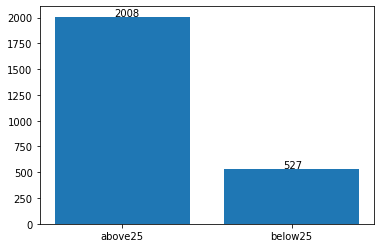

In [51]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(x = age_class.index, height=age_class.values)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+10));
age_class.values.sum()

## 4: Plot number of killed poeple by race

In [54]:
race_frequency = kill.race.value_counts()
race_frequency

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

2340

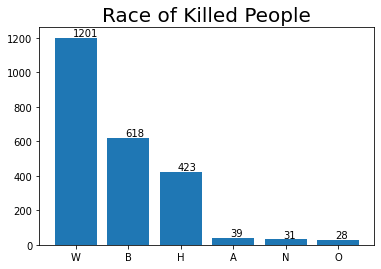

In [59]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(x = race_frequency.index, height=race_frequency.values)
plt.title("Race of Killed People", color = "black", fontsize = 20)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+10));
race_frequency.values.sum()

## 5: Killed People According to Races (Pie Chart)

In [60]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat,categoryt,category
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25,above25,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25,above25,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25,below25,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25,above25,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25,above25,above25


In [61]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [64]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

In [65]:
kill.dropna(inplace=True)

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [66]:
kill.race.value_counts(dropna=False)

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [68]:
index=kill.race.value_counts(dropna=False).index
index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [70]:
values=kill.race.value_counts(dropna=False).values

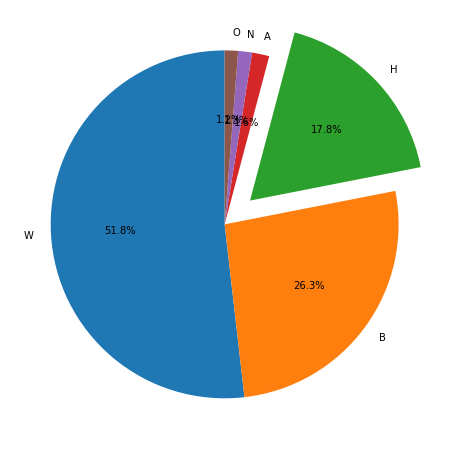

In [77]:
# matplotlib
explode=(0,0,0.2,0,0,0)

fig,ax = plt.subplots(figsize=(12,8))
ax.pie(x=values,
       explode=explode,
       labels=index,
       autopct="%.1f%%", 
       startangle=90);

